<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# План выполнения проекта

1. Загрузим и изучим данные.
2. Ответим на вопрос (необходимо обоснованиие): Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 - a. Изменится. Приведите примеры матриц.
 - b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Составим алгоритм преобразования данных для решения задачи (с обоснованием, почему качество линейной регрессии не поменяется).
4. Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

# Описание данных:

 - **Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.
 - **Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import plotly.express as px

import warnings
#убираем системные предупреждения
warnings.filterwarnings('ignore')

Считаем данные из csv-файла в датафрейм и сохраним в переменную.

In [2]:
data_personal = pd.read_csv('/datasets/insurance.csv')

In [3]:
data_personal.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data_personal.duplicated().sum()

153

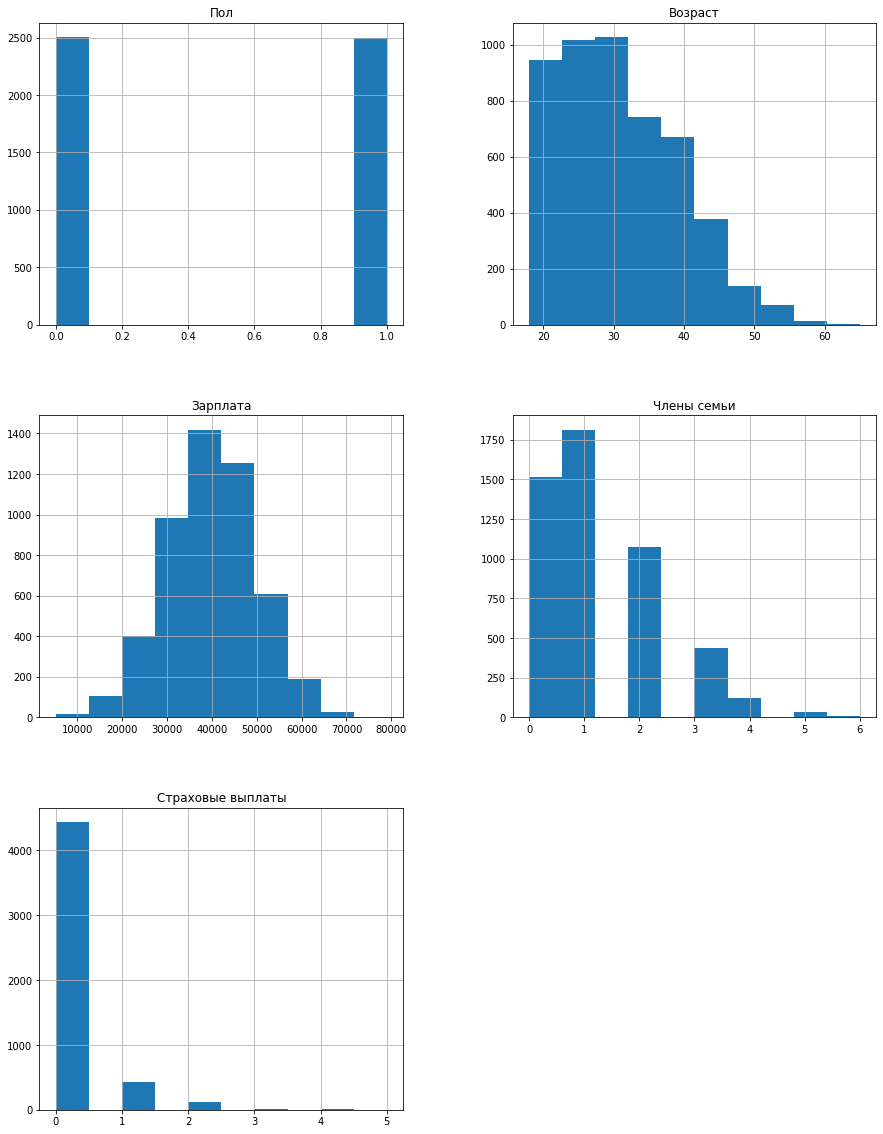

In [6]:
data_personal.hist(figsize=(15, 20));

In [7]:
data_personal.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [8]:
#data_personal.corr()

In [9]:
data_1 = data_personal.groupby('Страховые выплаты')['Возраст'].agg('count').reset_index()
data_1.columns = ['Страховые выплаты', 'count']
data_1

,Страховые выплаты,count
0,0,4436
1,1,423
2,2,115
3,3,18
4,4,7
5,5,1


In [10]:
data_2 = data_personal.groupby('Возраст')['Страховые выплаты'].agg(['count', 'sum']).reset_index()
data_2.columns = ['Возраст', 'count', 'sum']
data_2

,Возраст,count,sum
0,18.0,117,0
1,19.0,223,0
2,20.0,195,0
3,21.0,200,0
4,22.0,209,0
5,23.0,202,0
6,24.0,182,0
7,25.0,214,0
8,26.0,211,0
9,27.0,209,0


**Вывод по шагу 1:**

1. пропуски отсутствуют.
2. есть дубликаты - 153 шт., но, учитывая размер датасета, эти данные вполне могут относиться к разным людям, поэтому удалять из датафрейма их не будем. К тому же по условию, данные необходимо защитить.
3. выбросы визуально не наблюдаются.
4. Пол: мужчин и женщин примерно одинаковое количество
5. Среднее значение возраста 30 лет
6. По зарплате распределение близко к нормальному. Чуть скошено вправо.
7. В среднем в семье 1,1 член семьи. 
8. страховые выплаты: 4436 человек никогда не получали страховых выплат, 423 человека - один раз, 115 человек - 2 раза, 18 человек - 3 раза, 7 человек - 4 раза и один клиент получил выплаты 5 раз за последние пять лет.


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

В рамках данного шага нужно ответить на следующий вопрос с обоснованием: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** не изменится.

**Обоснование:** 

Предсказания высчитываются по формуле
$$a=Xw$$

Запишем новую матрицу признаков с учетом домножения на обратную матрицу (1.1)

$$Z=XP$$

Заменим X на Z и посмотрим, чему будет равно предсказание (1.2)

$$a_1=Zw_1$$

и вектор весов (1.3)

$$w_1 = (Z^T Z)^{-1} Z^T y$$

Подставим в уравнение 1.2 правую часть уравнения 1.3 (1.4)

$$a_1=Z(Z^T Z)^{-1} Z^T y$$

Заменим все Z правой части уравнения 1.1 (1.5)

$$a_1=XP((XP)^T (XP))^{-1} (XP)^T y$$

Раскроем $((XP)^T (XP))^{-1}$, применив следующее свойство обратной матрицы $(AB)^{-1}=B^{-1}A^{-1}$ (1.6)

$$a_1=XP((XP)^T (XP))^{-1} (XP)^T y=(XP)(XP)^{-1}((XP)^T)^{-1}(XP)^Ty=XPP^{-1}X^{-1}((XP)^T)^{-1}(XP)^Ty$$

Умножение приведет к следующему $PP^{-1}=E$

Дальше нам понадобится следующее свойство транспонированной матрицы $(AB)^T=B^TA^T$

Умножение на единичную матрицу ничего не изменит. Раскроем скобки $((XP)^T)^{-1}(XP)^Ty$ (1.7)

$$a_1=XEX^{-1}((XP)^T)^{-1}(XP)^Ty=XX^{-1}(P^TX^T)^{-1}P^TX^Ty=XX^{-1}(X^T)^{-1}(P^T)^{-1}P^TX^Ty$$

Умножение $(P^T)^{-1}P^T=E$. Упростим выражение (1.7)

$$a_1=XX^{-1}(X^T)^{-1}EX^Ty=X(X^TX)^{-1}X^Ty=Xw=a$$

<div class="alert alert-info">
<b>Комментарий студента №1</b>
    
Предсказания высчитываются по формуле
$$a=Xw$$

Запишем новую матрицу признаков с учетом домножения на обратную матрицу 
    
$$Z=XP$$

Формула обучения весов модели:

$$w=(X^TX)^{-1}X^Ty$$

Домножим матрицу признаков X на матрицу P:
    
$$w_1=((XP)^TXP)^{-1}(XP)^Ty$$

Раскроем скобки, применив $(AB)^T=B^TA^T$
    
$$w_1=(P^TX^TXP)^{-1}P^TX^Ty$$
    
Раскроем скобки, применив $(AB)^{-1}=B^{-1}A^{-1}$ 

$$w_1=(P^T(X^TX)P)^{-1}P^TX^Ty$$
    
$$w_1=P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$
    
Так как $(P^T)^{-1}P^T=E$, формула примет вид
    
$$w_1=P^{-1}(X^TX)^{-1}EX^Ty$$
    
Упростим выражение (уберем E) и получим
    
$$w_1=P^{-1}(X^TX)^{-1}X^Ty$$
    
$$w_1=P^{-1}w$$

Подставим полученное значение вектора весов линейной регрессии в формулу предсказаний    
$$a_1=Zw_1$$
    $$a_1=XP(P^{-1}w)$$
    $$a_1=Xw=a$$
</div>

**Вывод по шагу 2**

Так как нам удалось доказать, что $a = a_1$, делаем вывод, что качество линейной регрессии не меняется, если умножать признаки на обратимую матрицу.
Параметры в линейной регрессии с исходной задаче и в преобразованной связаны через веса матрицы, которая может быть умножена на обратную матрицу.

<div class="alert alert-info">
<b>Комментарий студента №1</b>
    
Параметры в линейной регрессии с исходной задаче и в преобразованной связаны через веса матрицы, которая может быть умножена на обратную матрицу.
    
Таким образом из формул видно, что веса исходной и домноженной матриц связаны как: $w_1=P^{-1}w$

</div>

## Алгоритм преобразования

По условиям проекта нужно защитить данные, чтобы при преобразовании данных качество моделей машинного обучения не ухудшилось. Пропишем следующие этапы алгоритма, а на следующем шаге проверим алгоритм.

**Алгоритм**:
1. Определение признаков и целевого признака.
2. Обучение модели без преобразования и получение метрики R2.
3. Создание рандомной матрицы.
4. Получение обратной рандомной матрицы.
5. Умножение обратимой матрицы на матрицу признаков.
6. Обучение модели на преобразованных признаках и получение метрики R2.
7. Сравнение метрики, вывод

**Обоснование**:

В соответствии с проведенным исследованием в пункте 2, домножение признаков на рандомную обратимую матрицу не приведет к изменению предсказаний, поэтому результаты r2 должны совпасть.

## Проверка алгоритма

**Проведем действия согласно алгоритма, написанного выше**

**Определим признаки и целевой признак.**

In [11]:
features = data_personal.drop('Страховые выплаты', axis=1)
target = data_personal['Страховые выплаты']

**Обучим модель на данных до преобразования и получим метрику r2**

In [12]:
model = LinearRegression()
model.fit(features, target)
prediction = model.predict(features)
r2 = r2_score(target, prediction).round(9)
r2

0.424945503

**Создадим рандомную матрицу.**

In [13]:
random_matrix = np.random.randn(4, 4)

В соответствии с полученными теоретическими знаниями из тренажера: "Чтобы найти обратную матрицу, вызовите функцию numpy.linalg.inv() (от англ. linear algebra, «линейная алгебра»; invert, «обратить»). Также она поможет проверить матрицу на обратимость: если матрица необратима, будет обнаружена ошибка."

In [14]:
try:
    matrix_linalg = np.linalg.inv(random_matrix)
    print('\nОбратная матрица к заданной существует')
except:
    print('\nОбратная матрица к заданной не существует')


Обратная матрица к заданной существует


**Умножим обратимую рандомную матрицу на матрицу признаков**

In [15]:
new_features=np.dot(features, matrix_linalg)

In [16]:
display(features.head()) # выведем данные признаков до преобразования

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [17]:
n_f = pd.DataFrame(new_features)
display(n_f.head()) # выведем данные признаков после преобразования

,0,1,2,3
0,728.127086,-48109.270578,56842.747722,61842.388452
1,557.520436,-36858.428456,43542.373800,47381.256340
2,308.035797,-20369.466265,24061.006003,26184.688344
3,613.020091,-40446.372258,47796.700855,51991.594513
4,382.691674,-25315.669288,29907.558535,32542.460168


Данные приобрели непонятные значения, что и требовалось для защиты информации.

**Обучение модели на преобразованных признаках и получение метрики R2**

In [18]:
new_model = LinearRegression()
new_model.fit(new_features, target)
new_prediction = new_model.predict(new_features)
new_r2 = r2_score(target, new_prediction).round(9)
new_r2

0.424945503

**Вывод**:
1. Провели исследование датафрейма в рамках предобработки данных.
2. Создали случайную обратимую матрицу.
3. Далее признаки умножили на рандомную обратимую матрицу.
4. Потом провели обучение модели и посмотрели изменится ли r2, если модель обучать на преобразованных признаках.
5. Проведенное сравнение качества моделей до преобразования и на преобразованных признаках показало, что значение r2 не изменилось. Это подтверждает, что умножение матрицы признаков на случайную (рандомную) матрицу преобразовывает данные и не влиеят на качество оценки модели.